In [60]:
#data-set 8.csv
# https://github.com/michaelofsbu/CSE-544-Datasets


#imports
from google.colab import drive
import numpy as numpy
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import binom
from numpy.linalg import inv
from numpy import dtype
from scipy.stats import gamma
import itertools
import math
plt.style.use('ggplot')

In [61]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Basic Info about Datafile 8.csv

In [62]:
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/8.csv')

df_cumm = df





print(df.head())
print()
print("Data start date: "+ str(df['Date'].min()))
print("Data start date: "+ str(df['Date'].max()))
print("Total days in the data: "+ str(len(df)))

totalrows = df.shape[0]


         Date  IL confirmed  IN confirmed  IL deaths  IN deaths
0  2020-01-22             0             0          0          0
1  2020-01-23             0             0          0          0
2  2020-01-24             1             0          0          0
3  2020-01-25             1             0          0          0
4  2020-01-26             1             0          0          0

Data start date: 2020-01-22
Data start date: 2021-04-03
Total days in the data: 438


# **PART1 : Data Pre-Processing**

# **Let's look at various statistics of the data**




Step1 : Converting cumulative datapoints to daily datapo

Step2 : Searching for missing values as a part of cleaning data

Step3 : Removing outliers if any

## Converting cummulative data points to daily data points

In [63]:
df1 = df.iloc[:,0]
#print(df1)
df.drop(df.columns[[0]], axis = 1, inplace = True)
#print(df)
for key, value in df.iteritems():
    po = value
    #print(type(po))
    ope = []
    for j in range(len(po)):
        if(j>0):
            ope.append(po[j]-po[j-1])
        else:
            ope.append(po[0])
    df[key] = ope
df["Date"] = df1.values


features = []

for i in range(len(df.columns)-1):
	features.append(df.columns[i])

print("Dataset features : " + str(features))

Dataset features : ['IL confirmed', 'IN confirmed', 'IL deaths', 'IN deaths']


## **Removing missing values**

In [64]:
data = pd.DataFrame([])
for feature in features:
    tempDict = {}
    tempDict['Feature'] = feature
    tempDict['Mean'] = df[feature].mean()
    tempDict['Std Dev'] = df[feature].std()
    tempDict['Missing values count'] = totalrows - len(df[df[feature].notna()])
    tempDict['Missing values %'] = tempDict['Missing values count']
    data = data.append(tempDict, ignore_index=True)

print(data)




        Feature         Mean  ...  Missing values count      Std Dev
0  IL confirmed  2863.442922  ...                   0.0  3183.408897
1  IN confirmed  1583.433790  ...                   0.0  1980.552477
2     IL deaths    48.812785  ...                   0.0    48.251834
3     IN deaths    29.858447  ...                   0.0    78.234074

[4 rows x 5 columns]


There are no missing values in any of the columns. So we need not care much about cleaning the data. Let's check for outliers in the next step using Tukey's rule.

## **Tukey's rule for detecting outliers**

In [65]:
#outliers
outlier_index = set()
for feature in features:
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1

    outlier_ = df[(df[feature] < Q1 - IQR*1.5) | (df[feature] > Q3 + 1.5*IQR)].index
    outlier_index = outlier_index.union(outlier_)

print(outlier_index)

print(str(len(outlier_index))+" outliers are found\n")
df = df.drop(outlier_index, axis=0)


print("After dropping the outliers, we have "+str(df.shape[0])+" datapoints")

{282, 284, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 335, 336, 337, 338, 342, 343, 344, 345, 346, 349, 350, 351, 352, 353, 354, 356, 358, 359, 104, 363, 366, 112, 379, 387, 193, 194, 217}
76 outliers are found

After dropping the outliers, we have 362 datapoints


I have used Tukey's rule on each column individually. Even if one attribute classify it as outlier, the whole data point is considered as outlier. This I've attained using a set() datastructure and update it whenever I detect a outlier.

Finally as you can see, the set() is notempty with 76 index values. So we can conclude there are 76 outliers. I'm removing all the outliers.
 

# **Data Analysis**

## **Box plot of 'IL confirmed'**

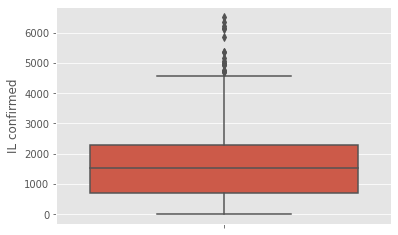

In [66]:
fig1 = seaborn.boxplot(y=df[features[0]])

## **Box plot of 'IN confirmed'**

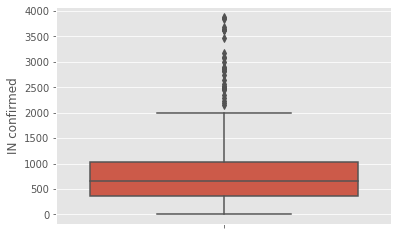

In [67]:
fig2 = seaborn.boxplot(y=df[features[1]])

## **Box plot of 'IL deaths'**

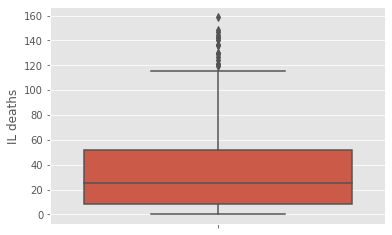

In [68]:
fig3 = seaborn.boxplot(y=df[features[2]])

## **Box plot of 'IN deaths'**

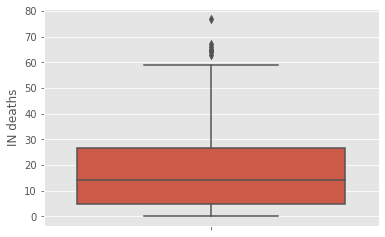

In [69]:
fig4 = seaborn.boxplot(y=df[features[3]])

## **Comparison of cases in IL and IN states**

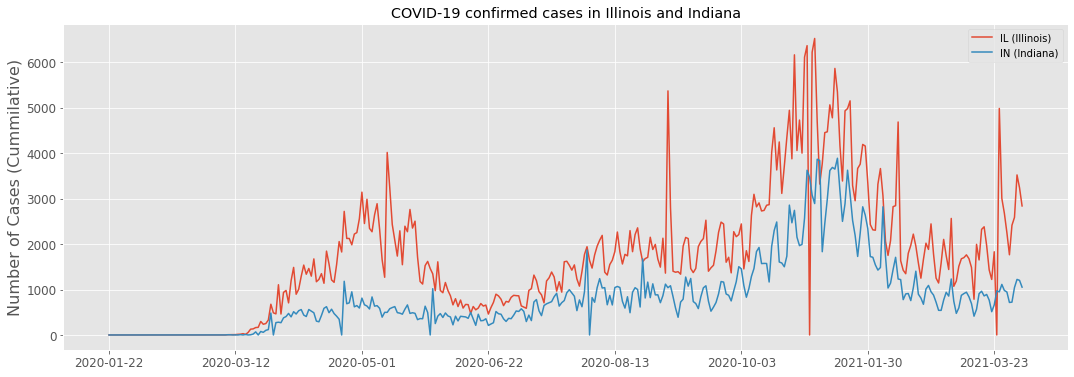

In [70]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(df['Date'], df['IL confirmed'], label="IL (Illinois)")
plt.plot(df['Date'], df['IN confirmed'], label="IN (Indiana)")
plt.legend(loc='best')
plt.title('COVID-19 confirmed cases in Illinois and Indiana')
plt.ylabel('Number of Cases (Cummilative)',fontsize = 16)
plt.xticks(np.arange(0, len(df), 50))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()



## **Comparison of deaths in IL and IN states**

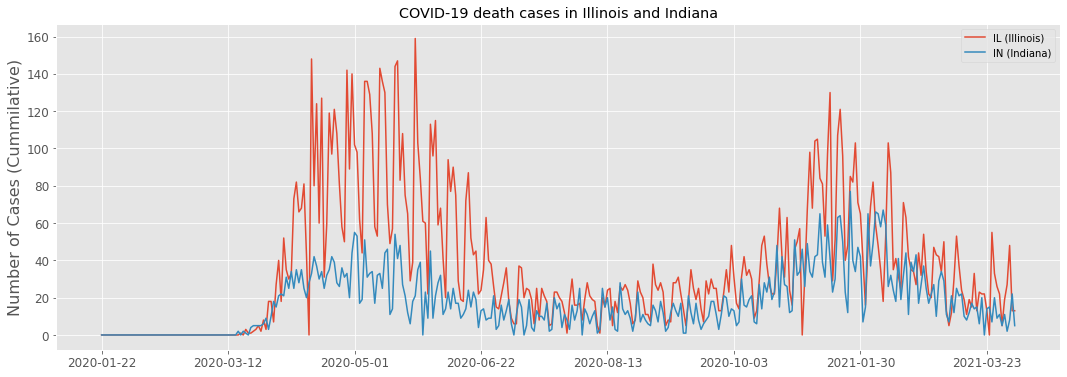

In [71]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(df['Date'], df['IL deaths'], label="IL (Illinois)")
plt.plot(df['Date'], df['IN deaths'], label="IN (Indiana)")
plt.legend(loc='best')
plt.title('COVID-19 death cases in Illinois and Indiana')
plt.ylabel('Number of Cases (Cummilative)',fontsize = 16)
plt.xticks(np.arange(0, len(df), 50))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# **PART 2a : Prediction in August '20 month**




**Error Functions for reporting the accuracy of my predictions**

In [72]:
#Error Functions MAPE and MSE
def MSE(Y_act, Y_pred):
    SSE = 0
    Y_sse = Y_act-Y_pred
    for i in range(0,len(Y_pred)):
        SSE = SSE + Y_sse[i]*Y_sse[i]
    return SSE/len(Y_act)

def MAPE(Y_act,Y_pred):
    err = (abs(Y_act-Y_pred))/Y_act
    MAPE = 0
    for i in range(0, len(Y_act)):
        MAPE = MAPE + err[i]
    return 100*MAPE/len(Y_act)  

In [73]:

#Beta function and Auto Regression
def Beta(X,Y):
    return np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)

def AR(aug_month, p, col):
    aug_3, aug_1 = aug_month[0:-7], aug_month[-7:0]
    aug_3 = aug_3.to_numpy()
    aug_3_cases = aug_3[:,col]
    X_train = []
    Y_train = []
    for i in range(len(aug_3_cases)-p):
        X_train = X_train + [aug_3_cases[i:i+p]]
        Y_train = Y_train + [aug_3_cases[i+p]]
    X_train, Y_train = np.array(X_train,dtype=float),np.array(Y_train,dtype=float)
    one_app = np.ones((len(X_train),), dtype=float)
    one_app = np.reshape(one_app,(len(one_app),1))
    X_train = np.append(one_app , X_train, axis = 1) 
    beta = Beta(X_train,Y_train)
    aug_np = aug_month.to_numpy()
    aug_cases = aug_np[:,col]
    x = []
    Y_pred = []
    Y_act = []
    for i in range(len(aug_cases)-7,len(aug_cases)):
        x = [aug_cases[i-p:i]]
        x = np.append([1],x)
        y = np.matmul(x,beta)
        Y_pred = Y_pred + [y]
        Y_act = Y_act + [aug_cases[i]]
    Y_pred, Y_act = np.array(Y_pred),np.array(Y_act)
    Y_pred = np.reshape(Y_pred,(len(Y_act),))
    return Y_pred,Y_act

def EWMA(aug_month, alpha, col):
    aug_np = aug_month.to_numpy()
    aug_cases = aug_np[:,col]
    Y_pred = [aug_cases[0]]
    Y_pred = np.array(Y_pred,dtype=float)
    Y_act = []
    for i in range(1,len(aug_cases)):
        Y_pred = np.append(Y_pred , [(alpha*aug_cases[i-1] +(1-alpha)*Y_pred[i-1])])
    Y_act = aug_cases
    Y_pred,Y_act = np.array(Y_pred[-7:]),np.array(Y_act[-7:])
    Y_pred = np.reshape(Y_pred,(len(Y_act),))
    return Y_pred,Y_act

In [74]:
aug_month = df[(df['Date'] >= '2020-08-01') & (df['Date'] <= '2020-08-28')]
print("-------------- TIME SERIES ANALYSIS FOR THE ILLIONIS STATE------------ ")
col = [0,2,1,3]
for c in col:
    print( "Time Series Analysis using : AR ")
    ar = [3, 5]
    for a in ar:
        Y_pred, Y_act = AR(aug_month,a,c)
        if( c == 1 or c ==2):
            print( "   MSE using AR(",a,") for # of COVID cases : ",MSE(Y_act, Y_pred))
            print( "   MAPE using AR(",a,") for # of COVID cases : ",MAPE(Y_act, Y_pred))
        else:
            print( "   MSE using AR(",a,") for # of COVID fatalities : ",MSE(Y_act, Y_pred))
            print( "   MAPE using AR(",a,") for # of COVID fatalities : ",MAPE(Y_act, Y_pred))
    print( " Using EWMA time series analysis ")
    ar = [0.5, 0.8]
    for a in ar:
        Y_pred, Y_act = EWMA(aug_month,a,c)
        if( c == 1 or c ==2):
            print( "   MSE using EWMA(",a,") for # of COVID cases : ",MSE(Y_act, Y_pred))
            print( "   MAPE using EWMA(",a,") for # of COVID cases : ",MAPE(Y_act, Y_pred))
        else:
            print( "   MSE using EWMA(",a,") for # of COVID fatalities : ",MSE(Y_act, Y_pred))
            print( "   MAPE using EWMA(",a,") for # of COVID fatalities : ",MAPE(Y_act, Y_pred))
    if(c == 3):
        print("-------------- TIME SERIES ANALYSIS FOR THE INDIANA STATE------------ ")

#col = [0,2,1,3]


-------------- TIME SERIES ANALYSIS FOR THE ILLIONIS STATE------------ 
Time Series Analysis using : AR 
   MSE using AR( 3 ) for # of COVID fatalities :  122872.72205712622
   MAPE using AR( 3 ) for # of COVID fatalities :  12.720051390973742
   MSE using AR( 5 ) for # of COVID fatalities :  164291.9795117699
   MAPE using AR( 5 ) for # of COVID fatalities :  16.740613726507025
 Using EWMA time series analysis 
   MSE using EWMA( 0.5 ) for # of COVID fatalities :  93981.0120588206
   MAPE using EWMA( 0.5 ) for # of COVID fatalities :  14.35864988607015
   MSE using EWMA( 0.8 ) for # of COVID fatalities :  92653.51727834626
   MAPE using EWMA( 0.8 ) for # of COVID fatalities :  12.893428483645723
Time Series Analysis using : AR 
   MSE using AR( 3 ) for # of COVID cases :  50.61458137982926
   MAPE using AR( 3 ) for # of COVID cases :  41.931729930360724
   MSE using AR( 5 ) for # of COVID cases :  66.20707908762164
   MAPE using AR( 5 ) for # of COVID cases :  33.69360565652969
 Using

## **EWMA with aplha=0.5,0.8 for IL Confirmed**

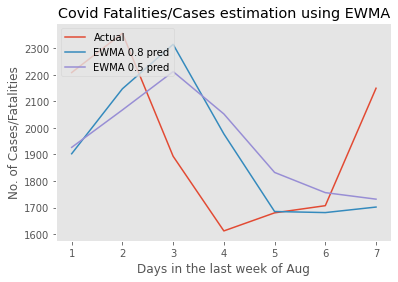

In [75]:

columns = [1,3,0,2]
col = 0
    
Y_pred_8,Y_act = EWMA(aug_month,0.8,col)


Y_pred_5,Y_act = EWMA(aug_month,0.5,col)   

X = [i for i in range(1,8)]
plt.figure('EWMA')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_8 ,label='EWMA 0.8 pred')
plt.plot(X, Y_pred_5 ,label='EWMA 0.5 pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using EWMA')
plt.legend(loc="upper left")
plt.grid()
plt.show()
        
    


## **EWMA with aplha=0.5,0.8 for IL Deaths**

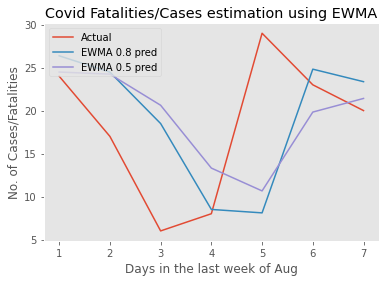

In [76]:
col = 2
Y_pred_8,Y_act = EWMA(aug_month,0.8,col)
Y_pred_5,Y_act = EWMA(aug_month,0.5,col)   

X = [i for i in range(1,8)]
plt.figure('EWMA')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_8 ,label='EWMA 0.8 pred')
plt.plot(X, Y_pred_5 ,label='EWMA 0.5 pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using EWMA')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **EWMA with aplha=0.5,0.8 for IN Confirmed**


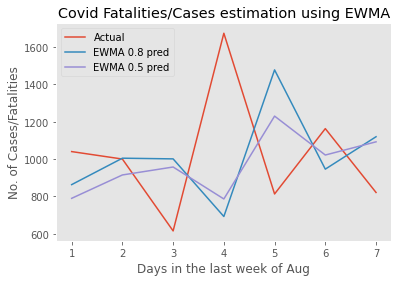

In [77]:
col = 1
Y_pred_8,Y_act = EWMA(aug_month,0.8,col)
Y_pred_5,Y_act = EWMA(aug_month,0.5,col)   

X = [i for i in range(1,8)]
plt.figure('EWMA')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_8 ,label='EWMA 0.8 pred')
plt.plot(X, Y_pred_5 ,label='EWMA 0.5 pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using EWMA')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **EWMA with aplha=0.5,0.8 for IN Deaths**


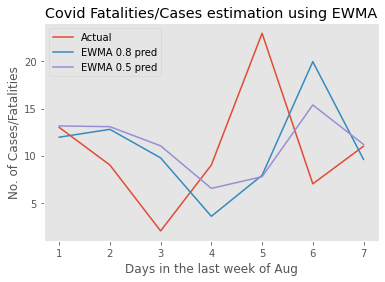

In [78]:
col = 3
Y_pred_8,Y_act = EWMA(aug_month,0.8,col)
Y_pred_5,Y_act = EWMA(aug_month,0.5,col)   

X = [i for i in range(1,8)]
plt.figure('EWMA')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_8 ,label='EWMA 0.8 pred')
plt.plot(X, Y_pred_5 ,label='EWMA 0.5 pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using EWMA')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **Auto Regression with p=3,5 for IL Confirmed**

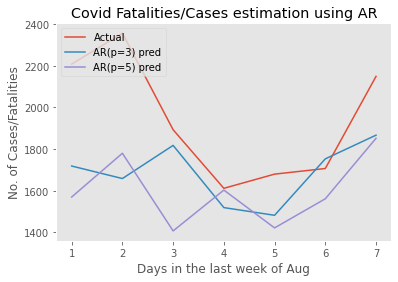

In [79]:
col = 0
Y_pred_ar5,Y_act = AR(aug_month,5,col)
Y_pred_ar3,Y_act = AR(aug_month,3,col)
plt.figure('AR')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_ar3 ,label='AR(p=3) pred')
plt.plot(X, Y_pred_ar5 ,label='AR(p=5) pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using AR')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **Auto Regression with p=3,5 for IL Deaths**

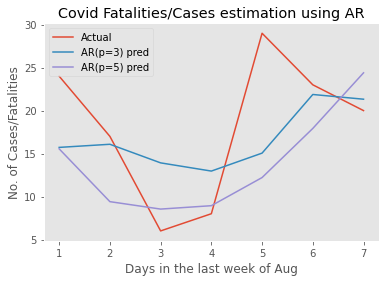

In [80]:
col = 2
Y_pred_ar5,Y_act = AR(aug_month,5,col)
Y_pred_ar3,Y_act = AR(aug_month,3,col)
plt.figure('AR')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_ar3 ,label='AR(p=3) pred')
plt.plot(X, Y_pred_ar5 ,label='AR(p=5) pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using AR')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **Auto Regression with p=3,5 for IN Confirmed**

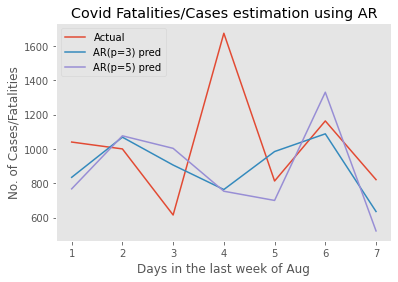

In [81]:
col = 1
Y_pred_ar5,Y_act = AR(aug_month,5,col)
Y_pred_ar3,Y_act = AR(aug_month,3,col)
plt.figure('AR')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_ar3 ,label='AR(p=3) pred')
plt.plot(X, Y_pred_ar5 ,label='AR(p=5) pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using AR')
plt.legend(loc="upper left")
plt.grid()
plt.show()

## **Auto Regression with p=3,5 for IN Deaths**

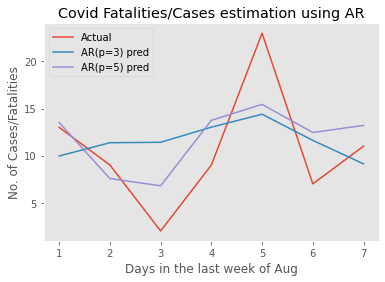

In [82]:
col = 3
Y_pred_ar5,Y_act = AR(aug_month,5,col)
Y_pred_ar3,Y_act = AR(aug_month,3,col)
plt.figure('AR')
plt.plot(X, Y_act ,label='Actual')
plt.plot(X, Y_pred_ar3 ,label='AR(p=3) pred')
plt.plot(X, Y_pred_ar5 ,label='AR(p=5) pred')
plt.xlabel('Days in the last week of Aug')
plt.ylabel('No. of Cases/Fatalities')
plt.title('Covid Fatalities/Cases estimation using AR')
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [83]:
df_out = pd.DataFrame()
df_out['Date'] = aug_month['Date'][-7:]
df_out['Actual_Cases'] = Y_act
df_out['Predicted_cases_AR(3)'] = Y_pred_ar3
df_out['Predicted_cases_AR(5)'] = Y_pred_ar5
df_ar = df_out.reset_index()
del df_ar['index']
print('PREDICTIONS USING AR(3) and AR(5)')
print(df_ar)

PREDICTIONS USING AR(3) and AR(5)
         Date  Actual_Cases  Predicted_cases_AR(3)  Predicted_cases_AR(5)
0  2020-08-21            13               9.962786              13.510117
1  2020-08-22             9              11.369561               7.564766
2  2020-08-23             2              11.414789               6.796103
3  2020-08-24             9              13.021625              13.748345
4  2020-08-25            23              14.396010              15.442694
5  2020-08-27             7              11.618570              12.455057
6  2020-08-28            11               9.123464              13.208006


# **PART 2b : Stats between Feb and Mar '21**

In [84]:
feb_month = df[(df['Date'] >= '2021-02-01') & (df['Date'] <= '2021-02-28')]
mar_month = df[(df['Date'] >= '2021-03-01') & (df['Date'] <= '2021-03-31')]


def variance(list_feature):
    sum_of_squared = 0
    mean = list_feature.mean()
    n = len(list_feature)
    for i in list_feature:
        sum_of_squared = sum_of_squared + (i -mean)*(i-mean)
    return sum_of_squared/(n-1)


## **Walds 1 sample testing for mean of Mar '21**

In [85]:
def walds_test_single(feature, sample_mean_feb):
	lambda_mar = mar_month[feature].mean()
	W = (lambda_mar - sample_mean_feb)/(np.sqrt(lambda_mar/len(mar_month)))

	W = abs(W)

	if(W > 1.96):
		print("We are rejecting NULL HYPOTHESIS for '" + feature + "' because absolute value of Walds 1 sample testing(W) is " + str(W) + " and it's greater than Z value(at 0.025) = 1.96")
	else:
		print("We are Accepting NULL HYPOTHESIS for '" + feature + "' because absolute value of Walds 1 sample testing(W) is " + str(W) + " and it's greater than Z value(at 0.025) = 1.96")

	# print(W)
	print('\n\n')



for feature in features:
	sample_mean_feb = feb_month[feature].mean()

	# print(mar_month[feature].mean())
	walds_test_single(feature, sample_mean_feb)


We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Walds 1 sample testing(W) is 42.35226129001656 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Walds 1 sample testing(W) is 78.57632268447536 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of Walds 1 sample testing(W) is 23.245403006405468 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of Walds 1 sample testing(W) is 31.82287875548597 and it's greater than Z value(at 0.025) = 1.96





### **Result of Walds 1 sample testing for mean of cases and death**

**Null hypothesis (H0):**

Mean of cases/deaths in Mar '21 = Mean of cases/deaths in Feb '21.

**Alternate hypothesis(H1):**

Mean of cases/deaths in Mar '21 not equals Mean of cases/deaths in Feb '21.


**Result:**

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Walds 1 sample testing(W) is 268.9736251180282 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Walds 1 sample testing(W) is 179.87439845233195 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of Walds 1 sample testing(W) is 38.92535543737809 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of Walds 1 sample testing(W) is 44.35531245905998 and it's greater than Z value(at 0.025) = 1.96


**Is the test applicable?**

Since we used MLE as estimator, it is Asymptotically Normal as n tends to infinity (n>=30 is satisfied). This is the only condition, hence the test is applicable.

## **Z 1 sample testing for mean of Mar '21**

In [86]:

def Z_test_single(feature, sample_mean_feb, true_variance):
	lambda_mar = mar_month[feature].mean()
	Z = (lambda_mar - sample_mean_feb)/np.sqrt(true_variance/len(mar_month))

	Z = abs(Z)

	if(Z > 1.96):
		print("We are rejecting NULL HYPOTHESIS for '" + feature + "' because absolute value of Z 1 sample testing(Z) is " + str(Z) + " and it's greater than Z value(at 0.025) = 1.96")
	else:
		print("We are Accepting NULL HYPOTHESIS for '" + feature + "' because absolute value of Z 1 sample testing(Z) is " + str(Z) + " and it's greater than Z value(at 0.025) = 1.96")

	# print(Z)
	print('\n\n')



for feature in features:
	sample_mean_feb = feb_month[feature].mean()
	true_variance = variance(df[feature].values)
	# print(np.sqrt(true_variance))
	Z_test_single(feature, sample_mean_feb, true_variance)







We are Accepting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Z 1 sample testing(Z) is 1.3420375064801386 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Z 1 sample testing(Z) is 2.755986312180163 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of Z 1 sample testing(Z) is 3.2438407289981175 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of Z 1 sample testing(Z) is 7.730917844623442 and it's greater than Z value(at 0.025) = 1.96





### **Result of Z 1 sample testing for mean of cases and death**

**Null hypothesis (H0):**

Mean of cases/deaths in Mar '21 = Mean of cases/deaths in Feb '21.

**Alternate hypothesis(H1):**

Mean of cases/deaths in Mar '21 not equals Mean of cases/deaths in Feb '21.


**Result:**

We are Accepting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Z 1 sample testing(Z) is 0.6754221197921421 and it's greater than Z value(at 0.025) = 1.96



We are Accepting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Z 1 sample testing(Z) is 0.5955376536202984 and it's greater than Z value(at 0.025) = 1.96



We are Accepting NULL HYPOTHESIS for 'IL deaths' because absolute value of Z 1 sample testing(Z) is 0.8191724665851586 and it's greater than Z value(at 0.025) = 1.96



We are Accepting NULL HYPOTHESIS for 'IN deaths' because absolute value of Z 1 sample testing(Z) is 1.2191958440379214 and it's greater than Z value(at 0.025) = 1.96


**Is the test applicable?**

There are 2 requirements for the Z test to be applicable:

1. std dev of the distribution is known : Satisfied
2. Either n tends to infinity (n>=30) or dataset is normal : Satisfied because n >= 30

Hence the test is applicable

## **T 1 sample testing for mean of Mar '21**

In [87]:
def T_test_single(feature, sample_mean_feb, sample_variance_mar):
	lambda_mar = mar_month[feature].mean()
	T = (lambda_mar - sample_mean_feb)/np.sqrt(sample_variance_mar/len(mar_month))

	T = abs(T)

	if(T > 2.042):
		print("We are rejecting NULL HYPOTHESIS for '" + feature + "' because absolute value of T 1 sample testing(Z) is " + str(T) + " and it's greater than T(30,0.025) = 2.042")
	else:
		print("We are Accepting NULL HYPOTHESIS for '" + feature + "' because absolute value of T 1 sample testing(Z) is " + str(T) + " and it's greater than Z(30,0.025) = 2.042")

	# print(T)
	print('\n\n')



for feature in features:
	sample_mean_feb = feb_month[feature].mean()
	sample_variance_mar = variance(mar_month[feature].values)
	# print(np.sqrt(sample_variance_mar))
	T_test_single(feature, sample_mean_feb, sample_variance_mar)

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of T 1 sample testing(Z) is 2.1745134413351876 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of T 1 sample testing(Z) is 11.254883013981798 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of T 1 sample testing(Z) is 8.100718477090918 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of T 1 sample testing(Z) is 14.6531755039721 and it's greater than T(30,0.025) = 2.042





### **Result of T 1 sample testing for mean of cases and death**

**Null hypothesis (H0):**

Mean of cases/deaths in Mar '21 = Mean of cases/deaths in Feb '21.

**Alternate hypothesis(H1):**

Mean of cases/deaths in Mar '21 not equals Mean of cases/deaths in Feb '21.


**Result:**

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of T 1 sample testing(Z) is 17.790801279678224 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of T 1 sample testing(Z) is 20.298201597921185 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of T 1 sample testing(Z) is 25.70299698367066 and it's greater than T(30,0.025) = 2.042



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of T 1 sample testing(Z) is 37.58384741574119 and it's greater than T(30,0.025) = 2.042



**Is the test applicable?**

T test is applicable when n value is very small, but here n >= 30 which means n tends to infinity.

Hence the test is not applicable

## **Walds 2 sample testing for mean of Feb '21 and Mar '21**

In [88]:
def walds_test_double(feature):
	lambda_feb = feb_month[feature].mean()
	lambda_mar = mar_month[feature].mean()


	delta = lambda_mar - lambda_feb
	W = (delta)/(np.sqrt(lambda_feb/len(feb_month) + lambda_mar/(len(mar_month))))

	W = abs(W)

	if(W > 1.96):
		print("We are rejecting NULL HYPOTHESIS for '" + feature + "' because absolute value of Walds 2 sample testing(W) is " + str(W) + " and it's greater than Z value(at 0.025) = 1.96")
	else:
		print("We are Accepting NULL HYPOTHESIS for '" + feature + "' because absolute value of Walds 2 sample testing(W) is " + str(W) + " and it's greater than Z value(at 0.025) = 1.96")

	# print(W)
	print('\n\n')





for feature in features:
	walds_test_double(feature)

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Walds 2 sample testing(W) is 27.32588888949588 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Walds 2 sample testing(W) is 47.07776564405046 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of Walds 2 sample testing(W) is 13.034832161505413 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of Walds 2 sample testing(W) is 16.01189363098298 and it's greater than Z value(at 0.025) = 1.96





### **Result of Walds 2 sample testing for mean of cases and death**

**Null hypothesis (H0):**

Mean of cases/deaths in Mar '21 = Mean of cases/deaths in Feb '21.

**Alternate hypothesis(H1):**

Mean of cases/deaths in Mar '21 not equals Mean of cases/deaths in Feb '21.


**Result:**

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of Walds 2 sample testing(W) is 187.4665744482369 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of Walds 2 sample testing(W) is 125.21233437856539 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of Walds 2 sample testing(W) is 27.16225354349577 and it's greater than Z value(at 0.025) = 1.96



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of Walds 2 sample testing(W) is 31.136159361564246 and it's greater than Z value(at 0.025) = 1.96


**Is the test applicable?**

Since we used MLE in case of estimator, it is Asymptotically Normal as n tends to infinity (n>=30 is satisfied). This is the only condition, hence the test is applicable.

## **T 2 sample unpaired testing for mean of Feb '21 and Mar '21**

In [89]:
def T_test_double(feature, sample_variance_feb, sample_variance_mar):
	lambda_feb = feb_month[feature].mean()
	lambda_mar = mar_month[feature].mean()


	delta = lambda_mar - lambda_feb
	T = (delta)/(np.sqrt(sample_variance_feb/len(feb_month) + sample_variance_mar/(len(mar_month))))
	T = abs(T)

	if(T > 2.0025):
		print("We are rejecting NULL HYPOTHESIS for '" + feature + "' because absolute value of T 2 sample testing(Z) is " + str(T) + " and it's greater than T(57,0.025) = 2.0025")
	else:
		print("We are Accepting NULL HYPOTHESIS for '" + feature + "' because absolute value of T 2 sample testing(Z) is " + str(T) + " and it's greater than Z(57,0.025) = 2.0025")

	# print(T)
	print('\n\n')


for feature in features:
	sample_variance_feb = variance(feb_month[feature].values)
	sample_variance_mar = variance(mar_month[feature].values)
	# print(np.sqrt(sample_variance_mar))
	T_test_double(feature, sample_variance_feb, sample_variance_mar)


We are Accepting NULL HYPOTHESIS for 'IL confirmed' because absolute value of T 2 sample testing(Z) is 1.5058619829930646 and it's greater than Z(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of T 2 sample testing(Z) is 4.111130199927878 and it's greater than T(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of T 2 sample testing(Z) is 4.1717202324659555 and it's greater than T(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of T 2 sample testing(Z) is 5.888125932314417 and it's greater than T(57,0.025) = 2.0025





### **Result of Walds 2 sample testing for mean of cases and death**

**Null hypothesis (H0):**

Mean of cases/deaths in Mar '21 = Mean of cases/deaths in Feb '21.

**Alternate hypothesis(H1):**

Mean of cases/deaths in Mar '21 not equals Mean of cases/deaths in Feb '21.


**Result:**

We are rejecting NULL HYPOTHESIS for 'IL confirmed' because absolute value of T 2 sample testing(Z) is 12.023210757714896 and it's greater than T(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IN confirmed' because absolute value of T 2 sample testing(Z) is 11.557631363866554 and it's greater than T(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IL deaths' because absolute value of T 2 sample testing(Z) is 12.279530786054828 and it's greater than T(57,0.025) = 2.0025



We are rejecting NULL HYPOTHESIS for 'IN deaths' because absolute value of T 2 sample testing(Z) is 6.490636933322033 and it's greater than T(57,0.025) = 2.0025



**Is the test applicable?**

T test is applicable when n value is very small, but here n >= 30 which means n tends to infinity.

Hence the test is not applicable

# **PART 2c : Stats of last 3 months in 2020**

##**Calculating MME parameters required**

##** Calculating all the MME parameters for IL(ILLINOIS) state and using them for all the 1 sample KS tests below as guess values on IN state(INDIANA) **

In [90]:
def calculate_MSE(y1, y2):
    return numpy.sum((y1 - y2) * (y1 - y2)) / len(y1)


def plot_eCDF(input_list, label, color):
    input_list.sort()
    # sort input array
    n = len(input_list)

    # initialize x and y to plt CDF
    x = [input_list[0]]
    y = [0]
    for point in input_list:
        value = y[len(y) - 1] + 1 / n
        # update x and y values
        x = x + [point, point]
        y = y + [y[len(y) - 1], value]

    # eCDF step function plot
    plt.plot(x, y, label=label, color=color)
    return x[1:], y[1:]


data = df.iloc[0:,0:4].to_numpy()
data = data[253:345, 0:].astype(numpy.float64)

# NUMBER OF CASES
cases_il = data[:, 0]
cases_states_sample_mean = numpy.mean(cases_il)
cases_states_sample_variance = numpy.var(cases_il)
cases_states_mme_poisson = cases_states_sample_mean
cases_state_mme_geometric = 1/cases_states_sample_mean
cases_states_mme_p_binomial = 1 - cases_states_sample_variance / cases_states_sample_mean
cases_state_mme_n_binomial = cases_states_sample_mean**2/(cases_states_sample_mean-cases_states_sample_variance)

# NUMBER OF DEATHS
deaths_il = data[:, 2]
deaths_sample_mean = numpy.mean(deaths_il)
deaths_sample_variance = numpy.var(deaths_il)
deaths_mme_poisson = deaths_sample_mean
deaths_mme_geometric = 1 / deaths_sample_mean
deaths_mme_p_binomial = 1 - deaths_sample_variance / deaths_sample_mean
deaths_mme_n_binomial = deaths_sample_mean ** 2 / (deaths_sample_mean - deaths_sample_variance)



##**KS 1 sample test with poisson as distribution for IN Confirmed**

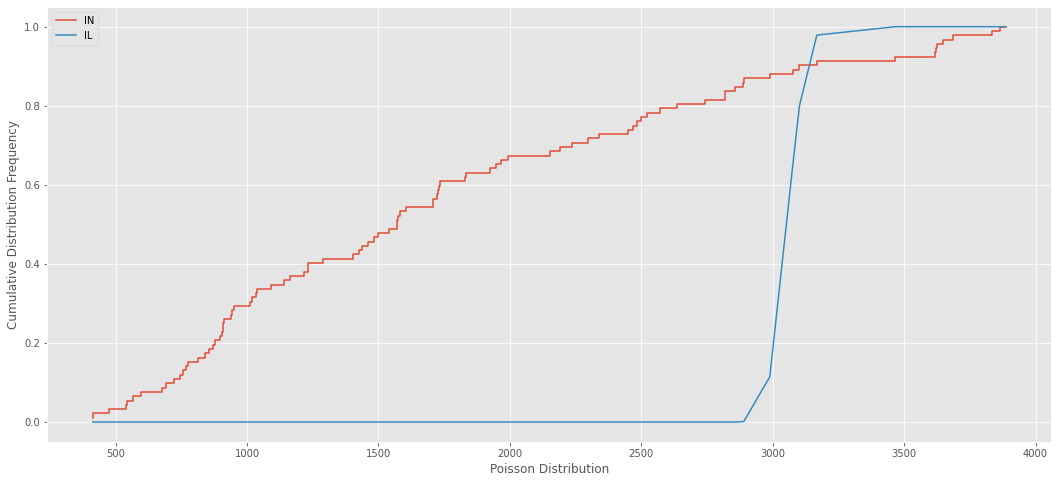

We reject NULL hypothesis, because Max value is 0.8465489593300235 > c : 0.05


In [91]:
# print(cases_states_mme_poisson)
cases_in = data[:, 1]
cases_in = numpy.sort(cases_in)
cdf_y = numpy.array([])
cdf = 0
n = len(cases_in)
max_diff = 0
poisson_xpoint = 0
poisson_cdf = numpy.array([])
for i in cases_in:
    poisson_point = poisson.cdf(i, cases_states_mme_poisson)
    poisson_cdf = numpy.append(poisson_cdf, poisson_point)
    if max_diff < numpy.abs(cdf-poisson_point):
        max_diff = numpy.abs(cdf-poisson_point)
        poisson_xpoint = poisson_point
    cdf += 1/n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Cases Case', figsize=(18,8))
plt.xlabel('Poisson Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(cases_in, cdf_y, label = "IN")
plt.plot(cases_in, poisson_cdf, label = "IL")
plt.legend(loc="upper left")
plt.show()

if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

##**KS 1 sample test with geometric as distribution for IN Confirmed**

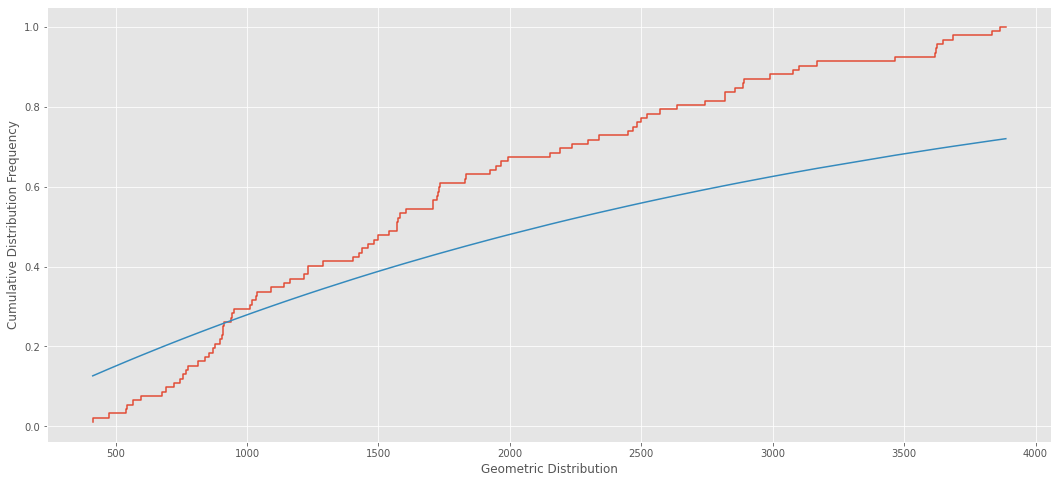

We reject NULL hypothesis, because Max value is 0.26935375076777535 > c : 0.05


In [92]:
# print(cases_state_mme_geometric)
cdf_y = numpy.array([])
cdf = 0
max_diff = 0
geom_cdf = numpy.array([])
geometric_dipoint = 0
for i in cases_in:
    geom_point = geom.cdf(i, cases_state_mme_geometric)
    geom_cdf = numpy.append(geom_cdf, geom_point)
    if max_diff < numpy.abs(cdf - geom_point):
        max_diff = numpy.abs(cdf - geom_point)
        geometric_dipoint = geom_point
    cdf += 1 / n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Cases Case', figsize=(18,8))
plt.xlabel('Geometric Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(cases_in, cdf_y, label = "IN")
plt.plot(cases_in, geom_cdf, label = "IL")
plt.show()

if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

##**KS 1 sample test with binomial as distribution for IN Confirmed**

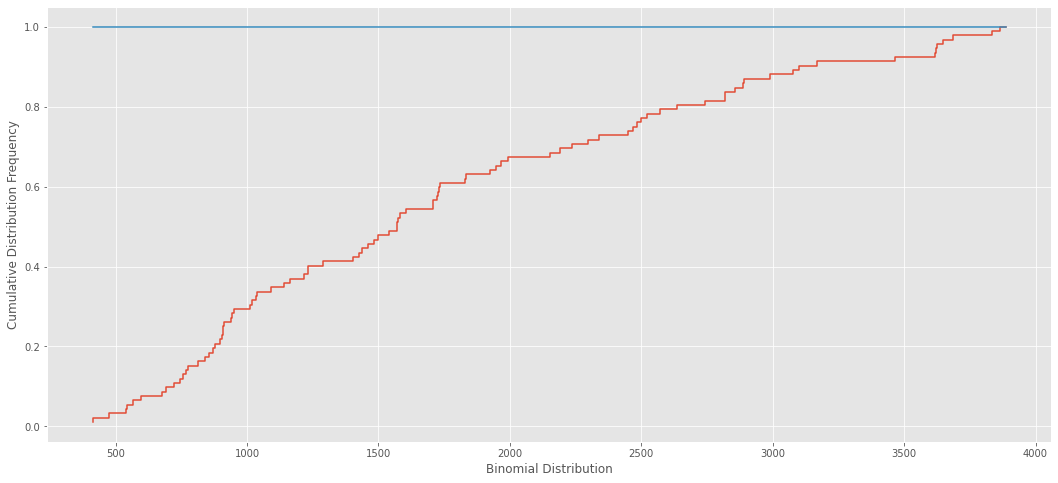

We reject NULL hypothesis, because Max value is 1.0 > c : 0.05


In [93]:
cdf_y = numpy.array([])
cdf = 0
max_diff = 0
binom_cdf = numpy.array([])
for i in cases_in:
    binom_point = binom.cdf(i, cases_state_mme_n_binomial, cases_states_mme_p_binomial)
    binom_cdf = numpy.append(binom_cdf, binom_point)
    if max_diff < numpy.abs(cdf - binom_point):
        max_diff = numpy.abs(cdf - binom_point)
    cdf += 1 / n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Cases Case', figsize=(18,8))
plt.xlabel('Binomial Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(cases_in, cdf_y, label = "IN")
plt.plot(cases_in, binom_cdf, label = "IL")
plt.show()

if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

##**KS 1 sample test with poission as distribution for IN Deaths**


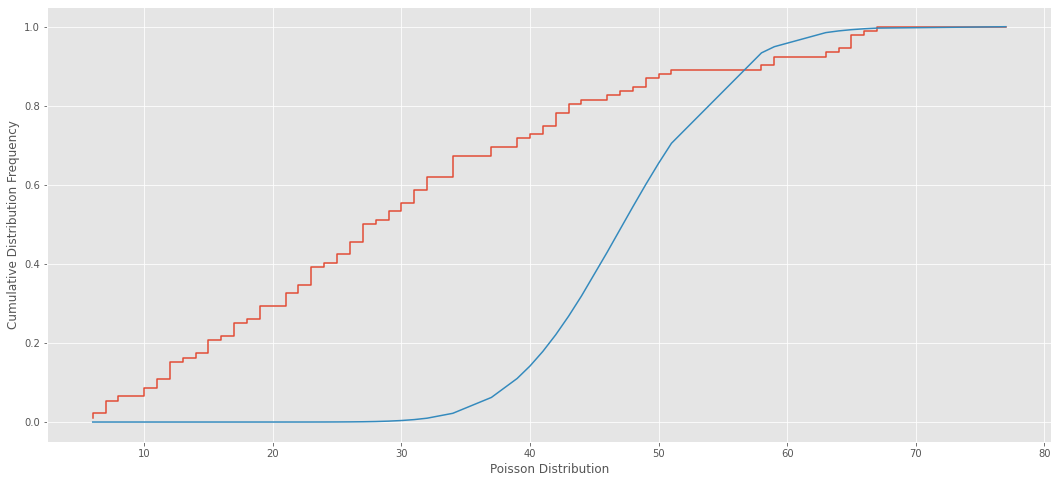

We reject NULL hypothesis, because Max value is 0.6300783615975943 > c : 0.05


In [94]:

# print(deaths_mme_poisson)
deaths_in = data[:, 3]
deaths_in = numpy.sort(deaths_in)
cdf_y = numpy.array([])
cdf = 0
n = len(deaths_in)
max_diff = 0
poisson_cdf = numpy.array([])
for i in deaths_in:
    poisson_point = poisson.cdf(i, deaths_mme_poisson)
    poisson_cdf = numpy.append(poisson_cdf, poisson_point)
    if max_diff < numpy.abs(cdf - poisson_point):
        max_diff = numpy.abs(cdf - poisson_point)
    cdf += 1 / n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Deaths Case', figsize=(18,8))
plt.xlabel('Poisson Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(deaths_in, cdf_y, label = "IN")
plt.plot(deaths_in, poisson_cdf, label = "IL")
plt.show()

if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

##**KS 1 sample test with geometric as distribution for IN Deaths**


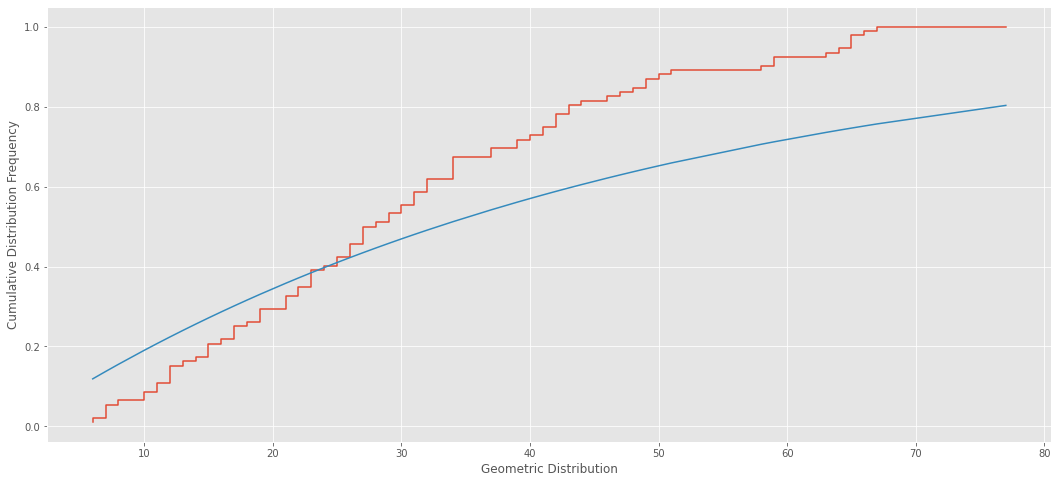

We reject NULL hypothesis, because Max value is 0.22147478129654763 > c : 0.05


In [95]:

# print(deaths_mme_geometric)
cdf_y = numpy.array([])
cdf = 0
max_diff = 0
geom_cdf = numpy.array([])
for i in deaths_in:
    geom_point = geom.cdf(i,  deaths_mme_geometric)
    geom_cdf = numpy.append(geom_cdf, geom_point)
    if max_diff < numpy.abs(cdf - geom_point):
        max_diff = numpy.abs(cdf - geom_point)
    cdf += 1 / n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Deaths Case', figsize=(18,8))
plt.xlabel('Geometric Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(deaths_in, cdf_y, label = "IN")
plt.plot(deaths_in, geom_cdf, label = "IL")
plt.show()



if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

##**KS 1 sample test with binomial as distribution for IN Deaths**


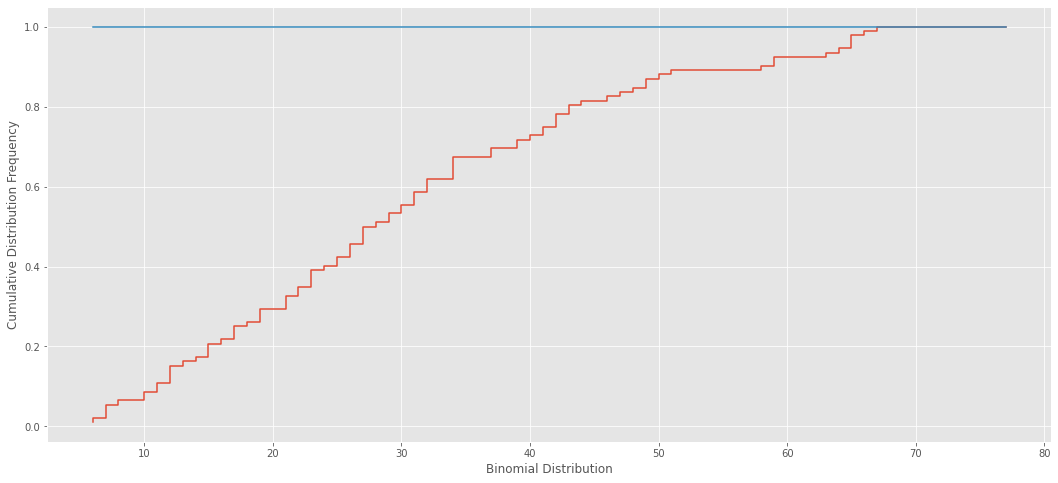

We reject NULL hypothesis, because Max value is 1.0 > c : 0.05


In [96]:

# print(deaths_mme_n_binomial, deaths_mme_p_binomial)
cdf_y = numpy.array([])
cdf = 0
max_diff = 0
binom_cdf = numpy.array([])
for i in cases_in:
    binom_point = binom.cdf(i, deaths_mme_n_binomial, deaths_mme_p_binomial)
    binom_cdf = numpy.append(binom_cdf, binom_point)
    if max_diff < numpy.abs(cdf - binom_point):
        max_diff = numpy.abs(cdf - binom_point)
    cdf += 1 / n
    cdf_y = numpy.append(cdf_y, cdf)

plt.figure('Deaths Case', figsize=(18,8))
plt.xlabel('Binomial Distribution')
plt.ylabel('Cumulative Distribution Frequency')
plt.step(deaths_in, cdf_y, label = "IN")
plt.plot(deaths_in, binom_cdf, label = "IL")
plt.show()


if max_diff > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_diff)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_diff)+" <= c : 0.05")

## **KS 2 sample test with IL Confirmed as dataset1 and IN confirmed as dataset2**

**NULL HYPOTHESIS:**

Distribution of dataset1 = Distribution of dataset2

Max Difference:  0.3804347826086955
Point with max Difference:  1605.0


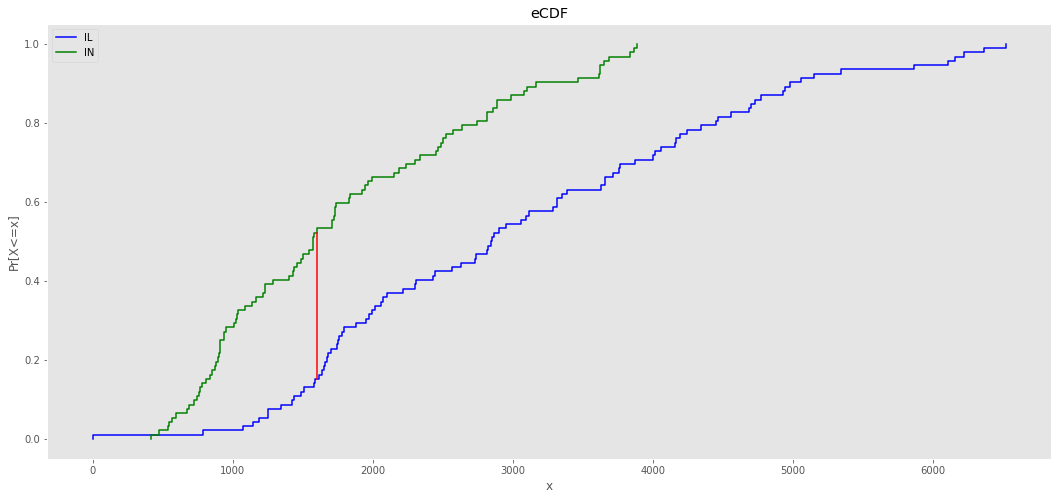

We reject NULL hypothesis, because Max value is 0.3804347826086955 > c : 0.05


In [97]:

# TWO POPULATION TEST
X = data[:, 0]
Y = data[:, 1]

# PLOT THE GRAPHS
plt.figure('eCDF', figsize=(18,8))
x1, y1 = plot_eCDF(X, 'IL', color='blue')
x2, y2 = plot_eCDF(Y, 'IN', color='green')

max_difference = 0
point = 0
point_y1 = 0
point_y2 = 0
i = 0
j = 0
while i < len(x2):
    y2_left, y2_right = y2[i], y2[i + 1]
    while j + 2 < len(x1) and x1[j + 2] < x2[i]:
        j += 2
    if x2[i] == x1[j]:
        y1_left, y1_right = y1[j], y1[j + 1]
    else:
        y1_left, y1_right = y1[j + 1], y1[j + 1]
    if max_difference < numpy.max([max_difference, numpy.absolute(y1_left - y2_left), numpy.absolute(y1_right - y2_right)]):
        max_difference = numpy.max([max_difference, numpy.absolute(y1_left - y2_left), numpy.absolute(y1_right - y2_right)])
        point_y1 = y1_left
        point_y2 = y2_left
        point = x2[i]
    i += 2
print('Max Difference: ', max_difference)
print('Point with max Difference: ', point)

# GRAPH ATTRIBUTES
plt.plot([point, point], [point_y1, point_y2], color='red')
plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('eCDF')
plt.legend(loc="upper left")
plt.grid()
plt.show()


if max_difference > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_difference)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_difference)+" <= c : 0.05")

## **KS 2 sample test with IL Deaths as dataset1 and IN Deaths as dataset2**

**NULL HYPOTHESIS:**

Distribution of dataset1 = Distribution of dataset2


Max Difference:  0.3152173913043484
Point with max Difference:  34.0


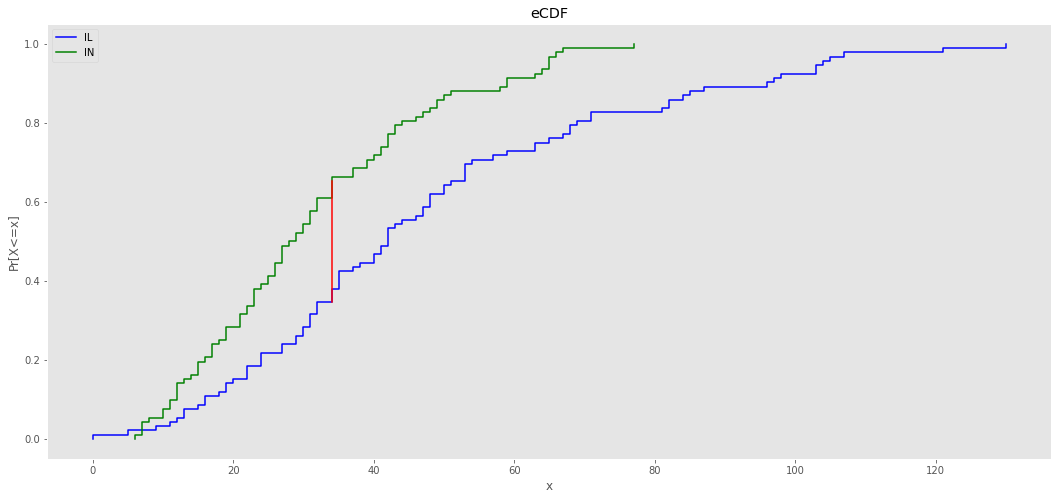

We reject NULL hypothesis, because Max value is 0.3152173913043484 > c : 0.05


In [98]:

# TWO POPULATION TEST
X = data[:, 2]
Y = data[:, 3]

# PLOT THE GRAPHS
plt.figure('eCDF', figsize=(18,8))
x1, y1 = plot_eCDF(X, 'IL', color='blue')
x2, y2 = plot_eCDF(Y, 'IN', color='green')

max_difference = 0
point = 0
point_y1 = 0
point_y2 = 0
i = 0
j = 0
while i < len(x2):
    y2_left, y2_right = y2[i], y2[i + 1]
    while j + 2 < len(x1) and x1[j + 2] < x2[i]:
        j += 2
    if x2[i] == x1[j]:
        y1_left, y1_right = y1[j], y1[j + 1]
    else:
        y1_left, y1_right = y1[j + 1], y1[j + 1]
    if max_difference < numpy.max([max_difference, numpy.absolute(y1_left - y2_left), numpy.absolute(y1_right - y2_right)]):
        max_difference = numpy.max([max_difference, numpy.absolute(y1_left - y2_left), numpy.absolute(y1_right - y2_right)])
        point_y1 = y1_left
        point_y2 = y2_left
        point = x2[i]
    i += 2
print('Max Difference: ', max_difference)
print('Point with max Difference: ', point)

# GRAPH ATTRIBUTES
plt.plot([point, point], [point_y1, point_y2], color='red')
plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('eCDF')
plt.legend(loc="upper left")
plt.grid()
plt.show()


if max_difference > 0.05:
    print("We reject NULL hypothesis, because Max value is "+str(max_difference)+" > c : 0.05")
else:
    print("We accept NULL hypothesis, because Max value is "+str(max_difference)+" <= c : 0.05")

## **Permutation test**

## **Permutation test with IL Confirmed as dataset1 and IN Confirmed as dataset2**

**NULL HYPOTHESIS:**

Distribution of dataset1 = Distribution of dataset2


In [99]:

data = df.iloc[0:,0:4].to_numpy()
data = data[253:345, 0:].astype(numpy.float64)

# CASES
x1 = data[:, 0]
y1 = data[:, 1]

X_avg = numpy.mean(x1)
Y_avg = numpy.mean(y1)
t_obs = numpy.absolute(X_avg - Y_avg)

number = 0
combined = numpy.append(x1, y1, axis=0)
for i in range(1000):
    permutation = numpy.random.permutation(combined)
    X_permutation = permutation[: len(x1)]
    Y_permutation = permutation[len(x1):]
    t_predict = numpy.absolute(numpy.mean(X_permutation) - numpy.mean(Y_permutation))
    if t_predict > t_obs:
        number += 1

p_value = number / 1000
print(p_value)
if p_value > 0.05:
    print('Reject Null Hypothesis as p value is '+str(p_value)+' which is greater than 0.5')
else:
    print('Accept Null Hypothesis as p value is '+str(p_value)+' which is greater than 0.5')



0.0
Accept Null Hypothesis as p value is 0.0 which is greater than 0.5


## **Permutation test with IL Deaths as dataset1 and IN Deaths as dataset2**

**NULL HYPOTHESIS:**

Distribution of dataset1 = Distribution of dataset2


In [100]:
# DEATHS
x2 = data[:, 2]
y2 = data[:, 3]

X_avg = numpy.mean(x2)
Y_avg = numpy.mean(y2)
t_obs = numpy.absolute(X_avg - Y_avg)

number = 0
combined = numpy.append(x2, y2, axis=0)
for i in range(1000):
    permutation = numpy.random.permutation(combined)
    X_permutation = permutation[: len(x2)]
    Y_permutation = permutation[len(x2):]
    t_predict = numpy.absolute(numpy.mean(X_permutation) - numpy.mean(Y_permutation))
    if t_predict > t_obs:
        number += 1

p_value = number / 1000
print(p_value)
if p_value > 0.05:
    print('Reject Null Hypothesis as p value is '+str(p_value)+' which is greater than 0.5')
else:
    print('Accept Null Hypothesis as p value is '+str(p_value)+' which is greater than 0.5')

0.0
Accept Null Hypothesis as p value is 0.0 which is greater than 0.5


# **PART 2d : Prediction using Bayesian Inference**

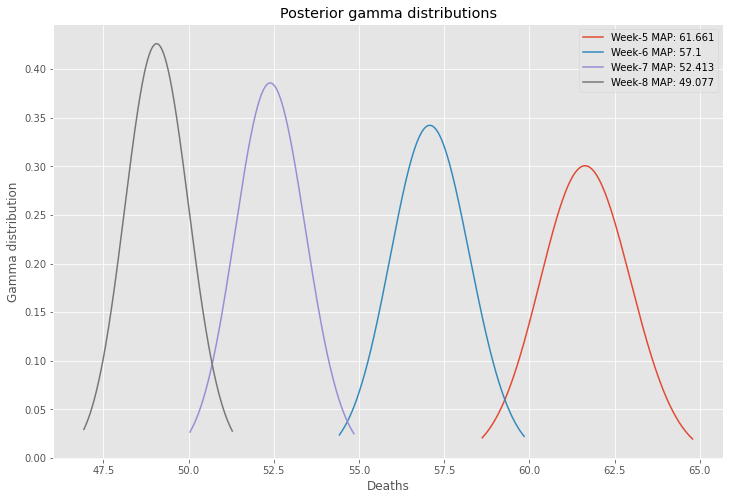

In [101]:
INdeaths = df[df['Date'] > '2020-05-31']['IN deaths']
ILdeaths = df[df['Date'] > '2020-05-31']['IL deaths']

# print(sum(INdeaths[:35]+ILdeaths[:35]))

INandILdeaths=list(INdeaths+ILdeaths)

# print(INandILdeaths)

def plot_gamma_distribution(alpha=1, beta=1, label="0"):
  x = np.linspace(gamma.ppf(0.01, alpha, scale=1/beta),gamma.ppf(0.99, alpha, scale=1/beta), 1000)
  plt.title("Posterior gamma distributions")
  label= label + " MAP: " + str(round((alpha/beta),3))
  plt.xlabel("Deaths")
  plt.ylabel("Gamma distribution")
  plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label=label)
  plt.legend()

beta=np.mean(INandILdeaths[:28])
# print(beta)
# print(sum(INandILdeaths[:35]))
# print(sum(INandILdeaths[:42]))
plt.figure(figsize=(12,8))

for i in range(4,8):
  alpha = sum(INandILdeaths[:(i+1)*7])+1
  # print(beta)
  scale = (i+1)*7 + 1/beta
  plot_gamma_distribution(alpha, scale, 'Week-'+str(i+1))

plt.show()

These diagrams portrays that as the weeks advances, the quantity of passings are expanding and hence the MAP for the Lambda boundary is expanding. 

Trust in MAP esteem is expanding as the weeks are expanding. 

We can likewise see that the pace of increment of MAP of Lambda is diminishing. Along these lines we can induce that increment in passings each week is going towards immersion.

# **PART 3 : EXPLORATORY TASK**

Our data set is the San Francisco crime data set. California State COVID data is used for the inferences.

## **Inference 1 : Correlation between SanFransisco crime and California Covid data**

In [102]:
def CorrelationCoeff(X,Y):
    X = X[57:88,1]
    Y = Y[57:88,1]
    X = X.astype(np.int)
    Y = Y.astype(np.int)
    return np.corrcoef(X, Y)


def Preprocessdata( X ):
    l = len(X)
    prev = X[0][0]
    count = 1;
    Y = []
    for i in range(0,l):
        if(X[i][0]==prev):
            count=count+1
        else:
            temp = [prev,int(count)]
            Y = Y+temp
            prev = X[i][0]
            count = 1
    Y = Y + [prev,count]            
    return np.reshape(np.array(Y),(len(Y)//2,2))
            
def Process(df):
    df1 = df.iloc[:,0]
    df.drop(df.columns[[0]], axis = 1, inplace = True)
    for key, value in df.iteritems():
        po = value
        ope = []
        co = 0
        prev = 0
        for j in po:
            if(co == 0):
                ope.append(j)
                prev = j
            else:
                ope.append(j-prev)
                prev = j
            co = co + 1
        df[key] = ope
    df["Date"] = df1.values
    columns_titles = ["Date","Cases"]
    df=df.reindex(columns=columns_titles)
    return df

def CorrelationCoeffWholeYear(X,Y):
    X = X[:,1]
    Y = Y[:,1]
    X = X.astype(np.int)
    Y = Y.astype(np.int)
    return np.corrcoef(X, Y)

In [103]:
cols_list = ['Incident Date']
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/SF_CrimeDataset.csv', usecols=cols_list)

Covid_data = pd.read_csv('gdrive/MyDrive/Colab Notebooks/US_confirmed.csv')
Covid_data.head()

CA_Covid_data = Covid_data.iloc[4].to_frame().reset_index().iloc[1:]
CA_Covid_data.columns = ['Date', 'Cases']
CA_Covid_data['Date'] = pd.to_datetime(CA_Covid_data['Date'])
CA_Covid_data = CA_Covid_data[(CA_Covid_data['Date'] >= '2020/01/01') & (CA_Covid_data['Date'] <= '2020/12/31') & (CA_Covid_data['Date'] != '2020/02/29')]
CA_Covid_data = Process(CA_Covid_data)


start2019 = "2019/01/01"
end2019 = "2019/12/31"
bef_covid_data = df[(df['Incident Date'] >= start2019) & (df['Incident Date'] <= end2019)]

start20 = "2020/01/01"
end20 = "2020/12/31"
aft_covid_data = df[(df['Incident Date'] >= start20) & (df['Incident Date'] <= end20) & (df['Incident Date'] != '2020/02/29')]

bef_covid_data = np.sort(bef_covid_data.to_numpy(), axis = 0)

bef_covid_data = Preprocessdata(bef_covid_data)

aft_covid_data = np.sort(aft_covid_data.to_numpy(), axis = 0)
aft_covid_data = Preprocessdata(aft_covid_data)

Correlation Coefficient considering the whole Year 2020 is :  -0.031275034531885064


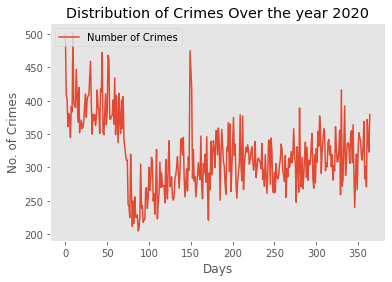

Correlation Coefficient considering the month of March 2020 is :  -0.7684999251821152


In [104]:
print("Correlation Coefficient considering the whole Year 2020 is : ", CorrelationCoeffWholeYear(aft_covid_data,np.array(CA_Covid_data))[1][0])

X = [i for i in range(365)]
plt.figure('Correlation of Covid and Number of Crimes')
plt.plot(X, aft_covid_data[:,1].astype(int) ,label='Number of Crimes')
plt.xlabel('Days')
plt.ylabel('No. of Crimes')
plt.title('Distribution of Crimes Over the year 2020')
plt.legend(loc="upper left")
plt.grid()
plt.show()
print("Correlation Coefficient considering the month of March 2020 is : ", CorrelationCoeff(aft_covid_data,np.array(CA_Covid_data))[1][0])


We tried to find the effect of COVID on the San Francisco Crime. For this, we computed the correlation between the COVID data set of California state with San Francisco.

**Correlation in the Year of Covid 2020 is found to be -0.03**

This tells us that there is no correlation between crimes and COVID. We are expecting a strong negative correlation of cases with the COVID due to the factors like lockdown etc. So, we observed the plot for the crimes in the year 2020. It is found that the cases went down suddenly in the months of MARCH and then slowly rose. So, in total there is not much correlation  throughout the year. So, we tried to get the correlation in the month of MARCH.

**Correlation in the Month of MARCH is found to be -0.77**

This can be assumed as a good negative correlation. Key Point observed is the Emergency lockdown has happened in the month of MARCH resulting in the reduction of number of crimes.
So, we can conclude that our estimate is reasonable.

## **Inference 2 : Permutation test to check whether the distribution of Sanfransico crime before covid and after covid is same or not** **bold text**

In [105]:
def PermutationTest(X, Y, rounds):
    X = X.astype(np.int)
    Y = Y.astype(np.int)
    count = 0
    diff = abs(np.mean(X) - np.mean(Y))
    tot = X+Y
    n = len(tot)
    for i in range(0,rounds):
        a=np.random.permutation(tot)[:n//2]
        b=np.random.permutation(tot)[n//2:]
        if (abs(a.mean() - b.mean())>diff):
            count+=1
    return (count/rounds)
print("P-value in Permutation Test", PermutationTest(bef_covid_data[:,1],aft_covid_data[:,1],1000 ))

P-value in Permutation Test 0.0


**Null Hypothesis (Ho)**
Distribution of Crimes an year before Covid 19 equals with after Covid 19

**Alternate Hypothesis (H1)**
Distribution of Crimes an year before Covid 19 not equals with after Covid 19

**Procedure:**

We have permuted all the data for 365 days of Crimes before the Covid i.e for 2019
and for all the data for 365 days of Crimes after Covid start i.e for 2020
for 1000 permutations.

**Result:**

We have got a permutation test value of  0.0 which is much less than the 
threshold of 0.05.
So we reject the null Hypothesis and accept the Alternate hypothesis.

Hence with the Permutation test, we can infer that the distribution of crimes before and after covid are not equal.

## **Inference 3 : Chi-Square Independence test**

In [106]:
def chi_square(matrix_covid_vehicle):
    rows = matrix_covid_vehicle.shape[0]
    cols = matrix_covid_vehicle.shape[1]
    df = (rows-1)*(cols-1)
    total_row1,total_row2 = np.sum(matrix_covid_vehicle,axis=0)
    total_col1,total_col2 = np.sum(matrix_covid_vehicle,axis=1)
    total = total_row1+total_row2
    expected_values = np.zeros([2,2])
    expected_values[0][0] = (float(total_col1)*total_row1)/(total)
    expected_values[0][1] = (float(total_col2)*total_row1)/(total)
    expected_values[1][0] = (float(total_col1)*total_row2)/(total)
    expected_values[1][1] = (float(total_col2)*total_row2)/(total)
    q_expected = 0.0
    for i in range(rows):
        for j in range(cols):
            q_expected = q_expected + ((expected_values[i][j] - matrix_covid_vehicle[i][j])**2)/float(expected_values[i][j])
    return (q_expected,df)

def initial():
    df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/SF_CrimeDataset.csv')
    start2019 = "2019/01/01"
    end2019 = "2019/12/31"
    bef_covid_data = df[(df['Incident Date'] >= start2019) & (df['Incident Date'] <= end2019)]


    start20 = "2020/01/01"
    end20 = "2020/12/31"
    aft_covid_data = df[(df['Incident Date'] >= start20) & (df['Incident Date'] <= end20) & (df['Incident Date'] != '2020/02/29')]

    features = ["Incident Datetime"]
    X1 = bef_covid_data.loc[:,features].values
    Y1 = aft_covid_data.loc[:,features].values

    am_count_precovid = 0
    pm_count_precovid = 0
    am_count_postcovid = 0
    pm_count_postcovid = 0
    for i in range(len(X1)):
        stry = str(X1[i])
        if stry.find("PM") != -1:
            pm_count_precovid = pm_count_precovid + 1
        else:
            am_count_precovid = am_count_precovid + 1
    
    for i in range(len(Y1)):
        stry = str(Y1[i])
        if stry.find("PM") != -1:
            pm_count_postcovid = pm_count_postcovid + 1
        else:
            am_count_postcovid = am_count_postcovid + 1


    matrix_covid_crime = np.zeros([2,2])
    matrix_covid_crime[0][0] = am_count_precovid
    matrix_covid_crime[0][1] = am_count_postcovid
    matrix_covid_crime[1][0] = pm_count_precovid
    matrix_covid_crime[1][1] = pm_count_postcovid

    q_observed,df = chi_square(matrix_covid_crime)
    print(q_observed,df)

initial()

90645.90707603919 1



In chi-square test we will check whether the Covid-19 affects the crimes taking place in the AM and PM timings.

In this we check whether the 2 sets **(X = Crimes Count in AM/PM, Y = Covid19 Dataset)** are independent or not.

**Our null hypothesis is that X is dependent on Y**

Ideally, the X has to be dependent on Y because due the Covid 19 there were a lot of restrictions on movement of people  and hence it should have reduced the number of crimes that takes place either during AM or PM.

We calcluate the chi-square value to find this.

If p-value > alpha, we will reject the null hypothesis, assuming alpha to be 0.05

We will have 2 rows and 2 columns. The columns will be Pre-Covid and Post-Covid, while the rows are Crimes during AM time and Crimes during PM time


**Result:**
Given alpha = 0.05.
Since Q statistic is really large, from the table we find that the p-value will be really small.
i.e p-value <<<< alpha

**So we fail to reject the null hypothesis and accept the null.**
**Hence, X is dependent on Y **
With this we can infer that the crimes during AM time and PM time both have a significant change due to Covid 19.